<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D,Dense,Flatten

In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X=x_test

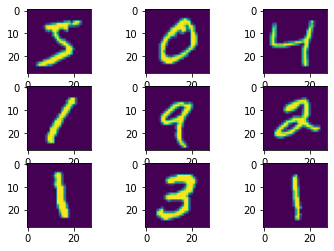

In [4]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [5]:
classes =[0,1,2,3,4,5,6,7,8,9]

In [6]:
#chuyen ve so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#xu li du lieu 
x_train/=255
x_test/=255
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
# MODEL CNN
model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation = 'softmax'))
opt = SGD(lr= 0.01, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_data = (x_test,y_test), verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
469/469 [==============================] - 31s 34ms/step - loss: 0.1888 - accuracy: 0.9395 - val_loss: 0.0385 - val_accuracy: 0.9879
Epoch 2/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0372 - val_accuracy: 0.9874
Epoch 3/100
469/469 [==============================] - 12s 25ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0233 - val_accuracy: 0.9923
Epoch 4/100
469/469 [==============================] - 12s 25ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0232 - val_accuracy: 0.9919
Epoch 5/100
469/469 [==============================] - 12s 27ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0227 - val_accuracy: 0.9928
Epoch 6/100
469/469 [==============================] - 12s 25ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0241 - val_accuracy: 0.9918
Epoch 7/100
469/469 [==============================] - 12s 26ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0230 - val_ac

In [13]:
# SAVE
model.save('CNN_mnist.h5')

In [14]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0343 - accuracy: 0.9940


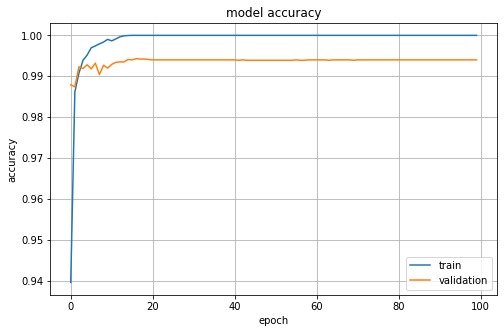

In [10]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

1

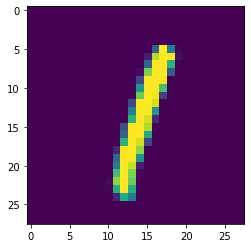

In [11]:
#kiem tra do chinhs xac model tu x_test
plt.imshow(X[5])
y_pred=model.predict(x_test)
label=int(np.argmax(y_pred[5]))
classes[label]

5

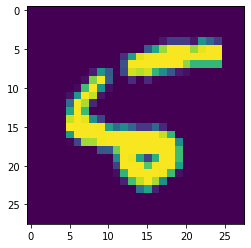

In [15]:
plt.imshow(X[8])
y_pred=model.predict(x_test)
label=int(np.argmax(y_pred[8]))
classes[label]